# HEART DISEASE PREDICTION
* The prediction model's purpose is to analyze various patient attributes and provide a prediction regarding the likelihood of heart disease, enabling timely medical interventions and patient care.
* The 3 key risk factors for heart disease: stroke, asthma and smoking.
* Other key indicators include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol.

## Problem Statement
The objective of this project is to develop a predictive model that determines the likelihood of an individual having heart disease based on various attributes and risk factors. The model will utilize a dataset containing demographic information, medical history, and lifestyle factors of individuals, and it will aim to provide accurate predictions regarding the presence or absence of heart disease.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

#for visualization we are using these libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading The Dataset

In [77]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Data Cleaning

In [78]:
df.shape

(319795, 18)

In [79]:
df.duplicated().sum()

18078

In [80]:
df.drop_duplicates(keep=False, inplace=True)

In [81]:
df.duplicated().sum()

0

In [7]:
df.shape

(289865, 18)

In [82]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [9]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289865 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289865 non-null  object 
 1   BMI               289865 non-null  float64
 2   Smoking           289865 non-null  object 
 3   AlcoholDrinking   289865 non-null  object 
 4   Stroke            289865 non-null  object 
 5   PhysicalHealth    289865 non-null  float64
 6   MentalHealth      289865 non-null  float64
 7   DiffWalking       289865 non-null  object 
 8   Sex               289865 non-null  object 
 9   AgeCategory       289865 non-null  object 
 10  Race              289865 non-null  object 
 11  Diabetic          289865 non-null  object 
 12  PhysicalActivity  289865 non-null  object 
 13  GenHealth         289865 non-null  object 
 14  SleepTime         289865 non-null  float64
 15  Asthma            289865 non-null  object 
 16  KidneyDisease     28

* The output shows that we have around 289865 entries with 18 columns. 
* There are no null values, and we have 14 numeric features, and 4 categorial features. 
* We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [13]:
df.nunique()

HeartDisease           2
BMI                 3603
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

* Since we have some attributes that have more than two unique values, we'll use a simple replacement of specific categorical values with numerical values within the DataFrame.

##  Numerical Features

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,289865.000000,289865.000000,289865.000000,289865.000000
mean,28.521254,3.717099,4.279499,7.076349
std,6.542182,8.271924,8.246458,1.488499
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.870000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [14]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

* 'Yes' is replaced with 1.
* 'No' is replaced with 0.
* 'Male' is replaced with 1.
* 'Female' is replaced with 0.
* 'No, borderline diabetes' is replaced with '0' (as a string).
* 'Yes (during pregnancy)' is replaced with '1' (as a string).

##  Visualization Of Categorical Features

0    262709
1     27156
Name: HeartDisease, dtype: int64


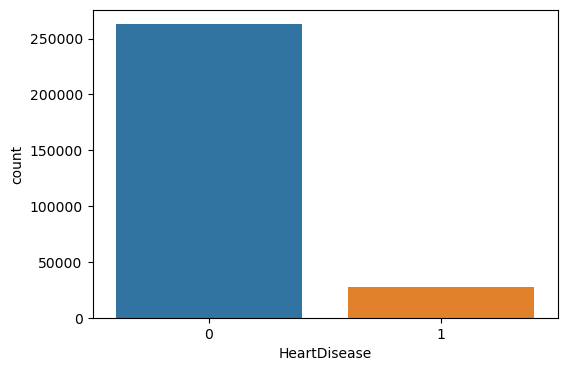

In [15]:
y = df["HeartDisease"]
plt.figure(figsize=(6, 4))
sns.countplot(x=df["HeartDisease"], data=df)
target_temp = df.HeartDisease.value_counts()
print(target_temp)

* We first extract the "HeartDisease" column as y.
* Then, we create a count plot using sns.countplot() with "HeartDisease" on the x-axis and the data from df.
* We calculate and print the count values using value_counts().
* Finally, we add labels and a title to the plot and display it using plt.show().

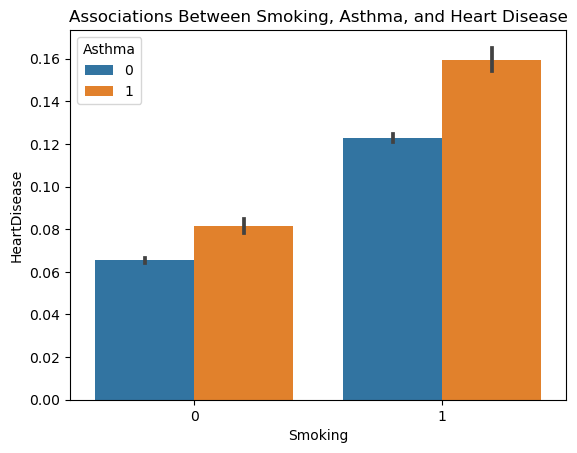

In [16]:
y = df["HeartDisease"]
sns.barplot(x="Smoking", y="HeartDisease", hue="Asthma", data=df)

plt.xlabel("Smoking")
plt.ylabel("HeartDisease")
plt.title("Associations Between Smoking, Asthma, and Heart Disease")

plt.legend(title="Asthma")

plt.show()

### Insights from the above graph
* If a person has asthma and he smokes, then he is more likely to have a heart disease.
* If a person has asthma and he does not smoke, then he may or may not have a heart disease.
* Non-asthmatic smokers face higher heart disease risk.
* Non-asthmatic non-smokers have lower heart disease risk.
* Smokers form the largest heart disease group. Some non-smokers also experience heart disease due to other factors.

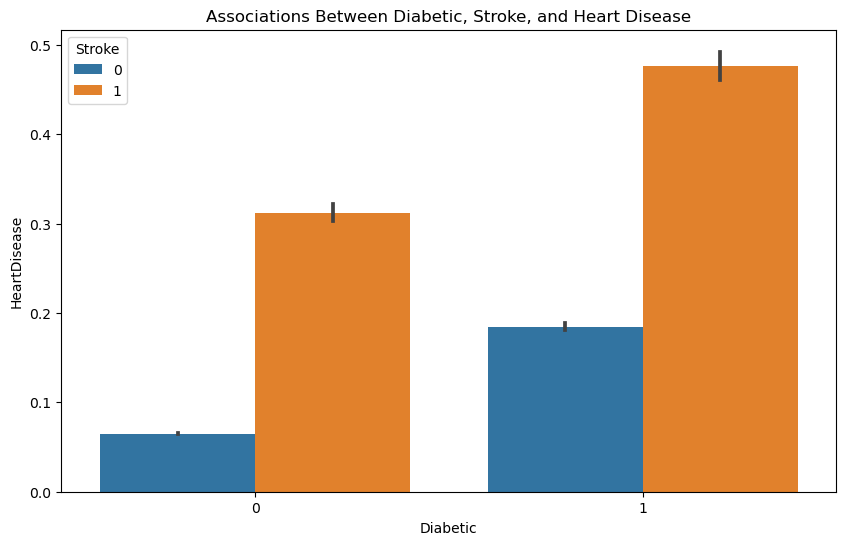

In [17]:
plt.figure(figsize=(10, 6))  # 10 inches wide and 6 inches tall

sns.barplot(x='Diabetic', y=y, hue='Stroke', data=df)
plt.xlabel('Diabetic')
plt.ylabel('HeartDisease')
plt.title("Associations Between Diabetic, Stroke, and Heart Disease")
plt.legend(title="Stroke") 
plt.show()

###  Insights from the above graph
* Having both diabetes and a history of stroke increases the likelihood of developing heart disease.
* If an individual has diabetes but no history of stroke, their probability of having heart disease is lower.
* For individuals without diabetes but with a history of stroke, the risk of heart disease is higher.
* If an individual has neither diabetes nor a history of stroke, their likelihood of having heart disease is lower.

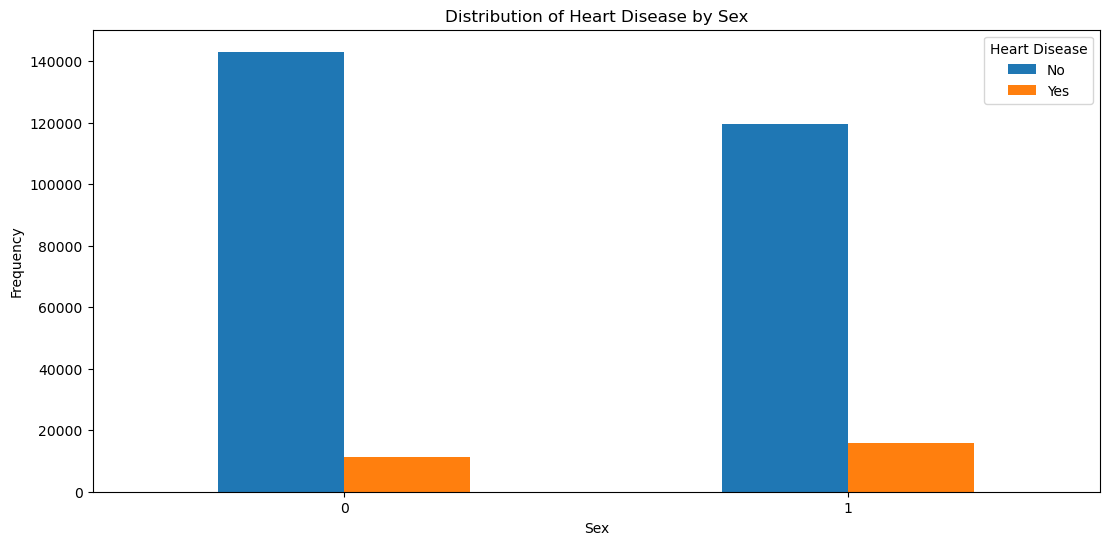

In [18]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the "Sex" column for "HeartDisease" values 0 and 1
heart_disease_counts = df.groupby(["Sex", "HeartDisease"]).size().unstack()

# Create a vertical bar plot
ax = heart_disease_counts.plot(kind="bar", figsize=(13, 6))

# Customize the plot
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")
plt.title("Distribution of Heart Disease by Sex")
ax.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(rotation=0)

plt.show()


* The number 1 refers to men and 0 refers to women on the x-axis.
* Inference from this graph suggests that men are more prone to heart disease than women.

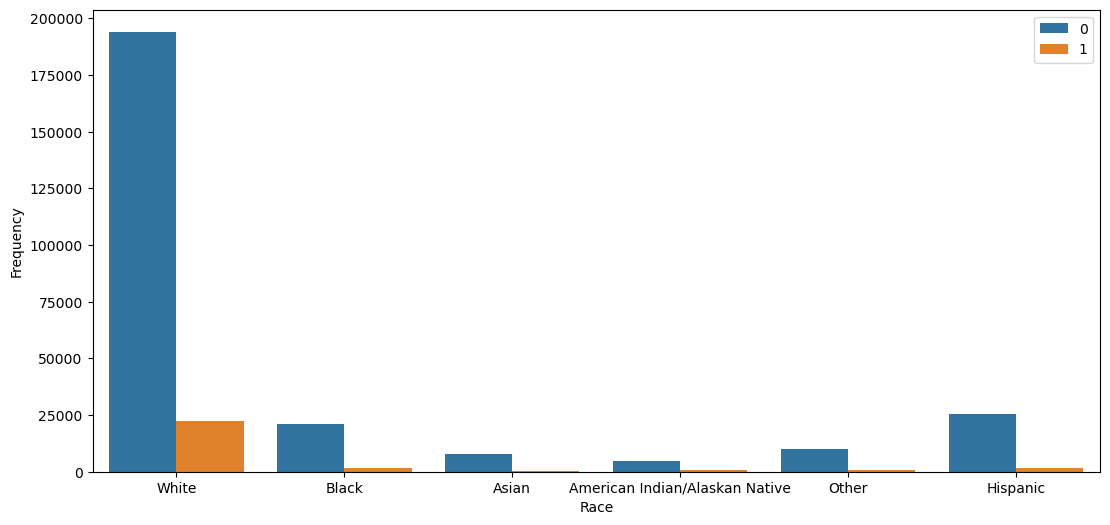

In [19]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df)
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

* 1 refers to heart disease.
* 0 refers to normal state.
* We can see that white people are more susceptible to heart disease.

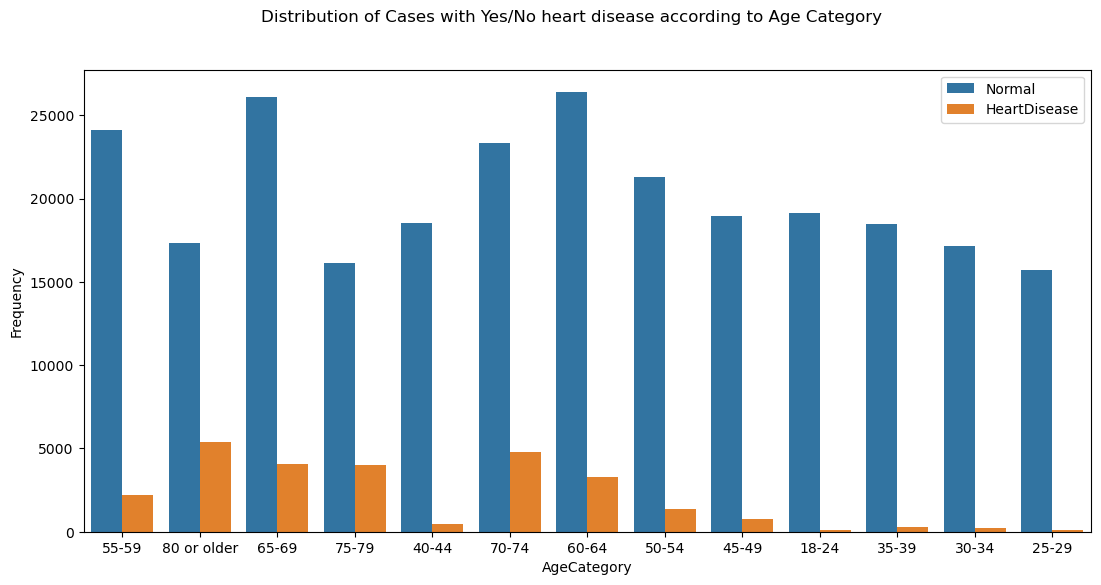

In [20]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df)
plt.suptitle("Distribution of Cases with Yes/No heart disease according to Age Category")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

* We can see that people who are 80 or older are more likely to get Heart Diseases.

##  Visualization Of Numerical Features

<Axes: >

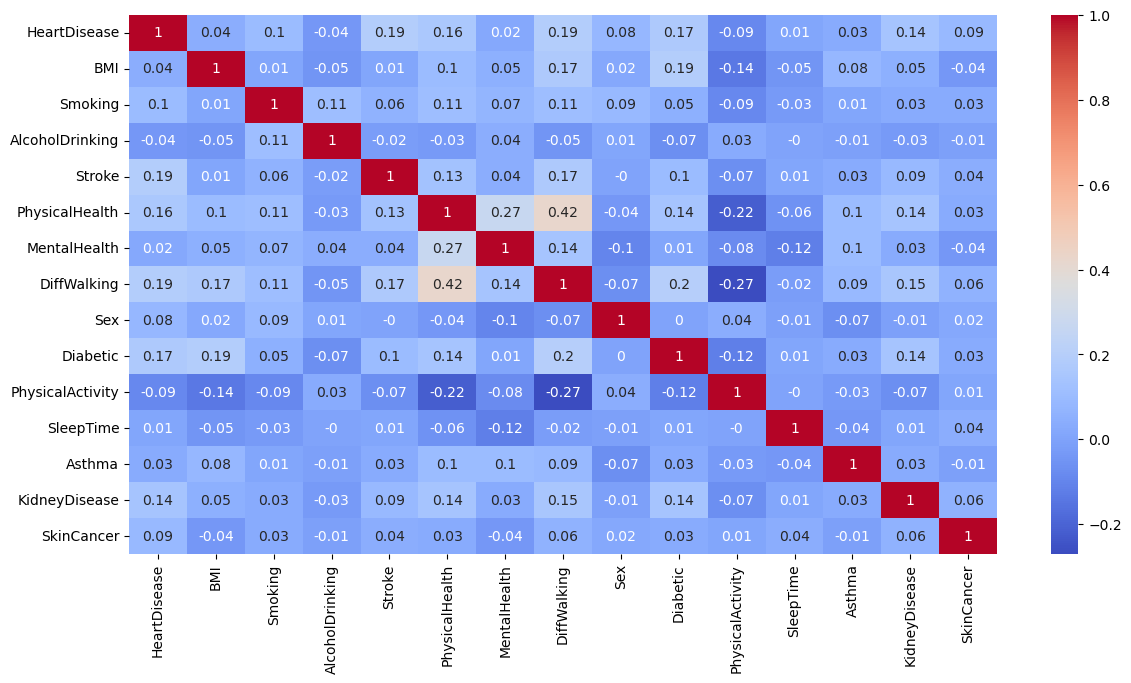

In [21]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

* In the heart disease dataset, a heatmap can be used to visually explore relationships and patterns among the numeric features.
* Colors are employed to represent the numeric values of these features. The lighter colors represent lower values, and darker colors represent higher values.
* There is a cluster of dark cells in the correlation matrix it means that those individuals are at a greater risk of having a heart disease.

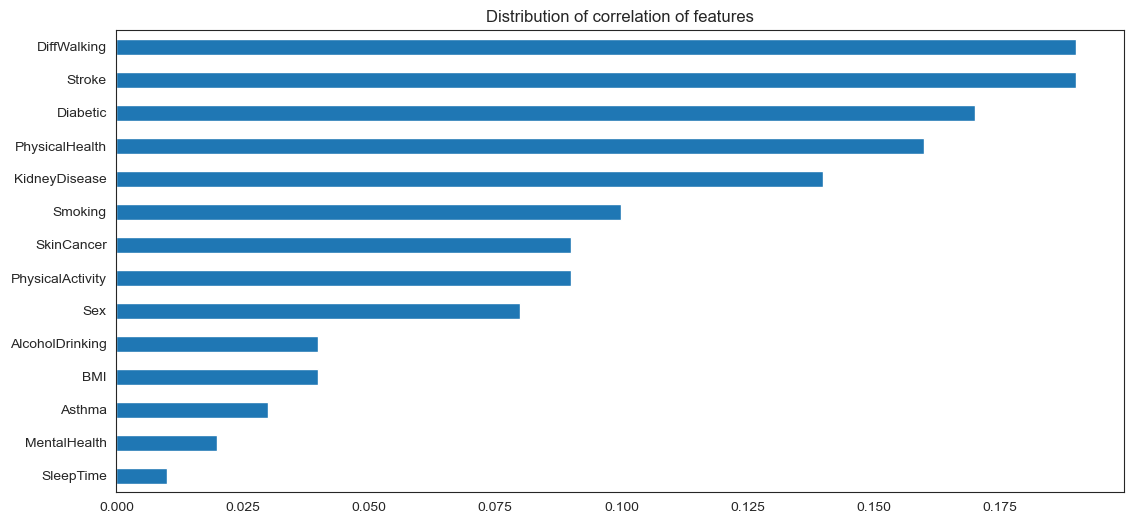

In [22]:
sns.set_style('white')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

* This horizontal bar plot visualizes the absolute correlation of features with the target variable 'HeartDisease' in a dataset.
* The correlation values are sorted in ascending order.
* It excludes the last value (which is the correlation of 'HeartDisease' with itself) 
* Difficulty walking has the highest positive correlation with the "HeartDisease" target variable in the dataset, it means that there is a strong relationship between having difficulty walking and the presence of heart disease among the individuals in the dataset.

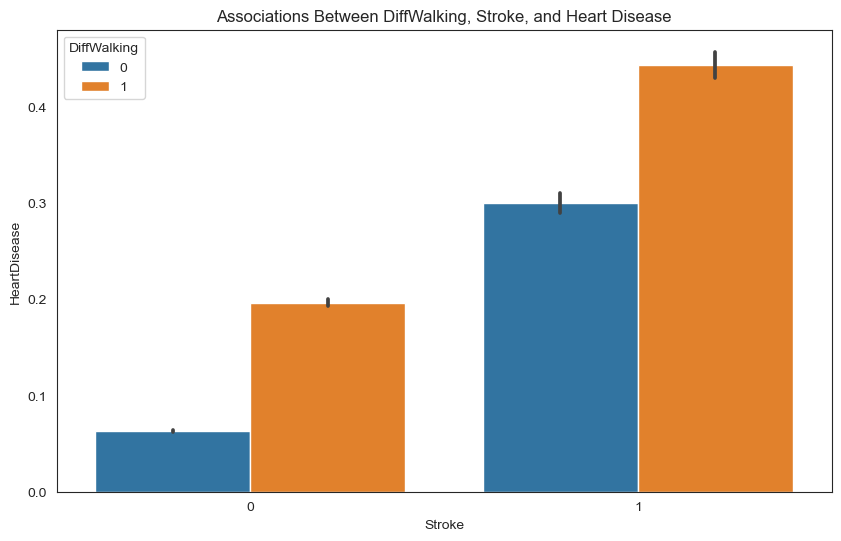

In [23]:
plt.figure(figsize=(10, 6))  # 10 inches wide and 6 inches tall
sns.barplot(x='Stroke', y=y, hue='DiffWalking', data=df)
plt.xlabel('Stroke')
plt.ylabel('HeartDisease')
plt.title("Associations Between DiffWalking, Stroke, and Heart Disease")
plt.legend(title="DiffWalking")
plt.show()

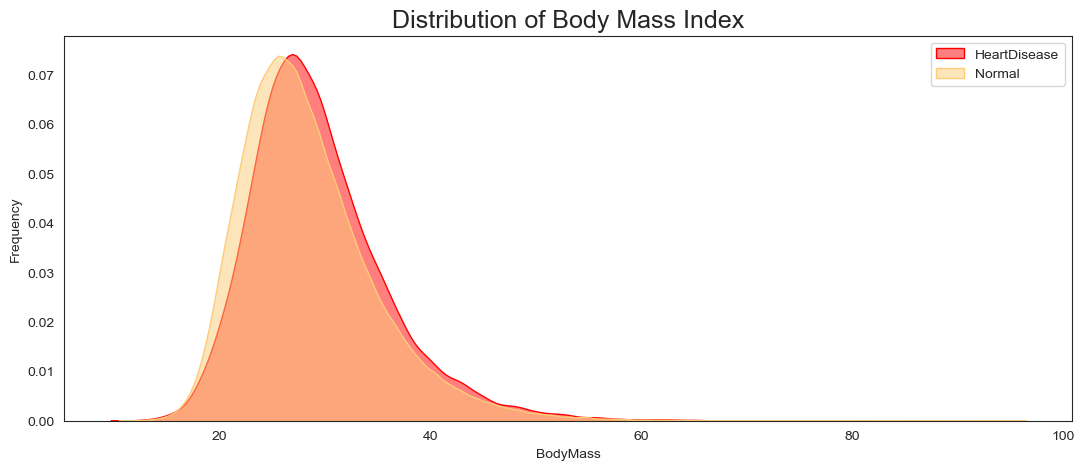

In [24]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

* Below 18.5 --> Underweight
* 18.5 – 24.9 --> Healthy Weight
* 25.0 – 29.9 --> Overweight
* 30.0 - 34.9 --> Obesity
* 35.0 and Above --> Extreme Obesity

## Model Building Process

## Specifying The Independent And Dependent Variables
* We are considering HeartDisease because it is a target variable we are dropping it from the features.

In [25]:
#Select Features (x)
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target (y)
target = df['HeartDisease']

## Splitting The Dataset For Training And Testing 

In [26]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = False, test_size = .2, random_state = 0)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (231892, 17)
Shape of testing feature: (57973, 17)
Shape of training label: (231892,)
Shape of training label: (57973,)


## Data Preprocessing

### Encoding

In [27]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)



# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)


# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

* Using scikit-learn's make_column_transformer and OneHotEncoder to preprocess your categorical features and then concatenate them back with your original data for both training and test sets.

### Standardization

In [28]:
scaler = StandardScaler()

# Scale trainint data
X_trains = scaler.fit_transform(X_train)

# Scale test data
X_tests = scaler.fit_transform(X_test)

* Standardization is used during the fit and transform phases of data preprocessing to ensure that the features (variables) have comparable scales. 
* This is required because many machine learning algorithms perform better when the input features are on similar scales.

### Modelling

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Building The Model

In [31]:
X_train

,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,onehotencoder__AgeCategory_45-49,onehotencoder__AgeCategory_50-54,onehotencoder__AgeCategory_55-59,onehotencoder__AgeCategory_60-64,onehotencoder__AgeCategory_65-69,...,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,30.0,0,0,1,1,5.0,1,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,1,7.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,20.0,30.0,0,1,1,1,8.0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,6.0,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.0,0.0,1,0,0,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,0,1,1,9.0,0,0,0
231888,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,1,3.0,1,0,0
231889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30.0,8.0,1,1,0,0,9.0,0,1,0
231890,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,7.0,0,0,0


In [32]:
X_trains # scaled values

array([[-0.26615313, -0.23897815, -0.25160545, ...,  2.4308332 ,
        -0.2055677 ,  2.99578162],
       [-0.26615313, -0.23897815, -0.25160545, ..., -0.41138158,
        -0.2055677 , -0.3338027 ],
       [-0.26615313, -0.23897815, -0.25160545, ...,  2.4308332 ,
        -0.2055677 , -0.3338027 ],
       ...,
       [-0.26615313, -0.23897815, -0.25160545, ..., -0.41138158,
         4.86457748, -0.3338027 ],
       [-0.26615313, -0.23897815, -0.25160545, ..., -0.41138158,
        -0.2055677 , -0.3338027 ],
       [-0.26615313, -0.23897815, -0.25160545, ..., -0.41138158,
        -0.2055677 , -0.3338027 ]])

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_trains,y_train)

Y_pred_lr = lr.predict(X_tests)

In [34]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 90.91 %


In [35]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_tests, y_test)

In [36]:
# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])# Evaluate Model

Accuracy: 0.9090956134752385
Precision: 0.5308863025962399
Recall: 0.11106948866828995
F1 Score: 0.18370508054522927
Cohens Kappa Score: 0.15683516645877071
Area Under Curve: 0.8270563379707309
Confusion Matrix:
 [[52110   524]
 [ 4746   593]]


## Logistic Regression (GridSearchCV) 

In [37]:
from sklearn.metrics import precision_score

In [38]:
from sklearn.model_selection import GridSearchCV
lrg = LogisticRegression()

In [39]:
# Create the param grid
param_grid = {
    'penalty': ['l1', 'l2'],        # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10], # Inverse of regularization strength
    'solver': ['saga'],# Solver algorithms for optimization
    'max_iter': [100, 200, 300]     # Maximum number of iterations for optimization
}
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['saga'], 'max_iter': [100, 200, 300]}


In [40]:
lrg_Grid=GridSearchCV(estimator=lrg, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

In [41]:
lrg_Grid.fit(X_trains, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='precision')

In [42]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", lrg_Grid.best_params_)

# Get the best trained model
best_model = lrg_Grid.best_estimator_

# Predict on the test data using the best modelyuju
y_pred_lrg = best_model.predict(X_tests)

# Calculate precision on the test data
precision = precision_score(y_test, y_pred_lrg)
print("Precision on Test Set:", precision)

Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Precision on Test Set: 0.5551181102362205


In [43]:
score_lrg = round(accuracy_score(y_pred_lrg,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lrg)+" %")

The accuracy score achieved using Logistic Regression is: 90.94 %


In [44]:
# Evaluate Model
lrg_eval = evaluate_model(lrg_Grid, X_tests, y_test)

In [45]:
# Print result
print('Accuracy:', lrg_eval['acc'])
print('Precision:', lrg_eval['prec'])
print('Recall:', lrg_eval['rec'])
print('F1 Score:', lrg_eval['f1'])
print('Cohens Kappa Score:', lrg_eval['kappa'])
print('Area Under Curve:', lrg_eval['auc'])
print('Confusion Matrix:\n', lrg_eval['cm']) #Evaluate Model

Accuracy: 0.9093543546133545
Precision: 0.5551181102362205
Recall: 0.07922831991009552
F1 Score: 0.13866579249303393
Cohens Kappa Score: 0.11838441985994896
Area Under Curve: 0.8248978607482276
Confusion Matrix:
 [[52295   339]
 [ 4916   423]]


## K-Nearest Neighbors Algorithm

In [74]:
err_rate=[]
for i in range (1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trains,y_train)
    pred_i=knn.predict(X_tests)
    err_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

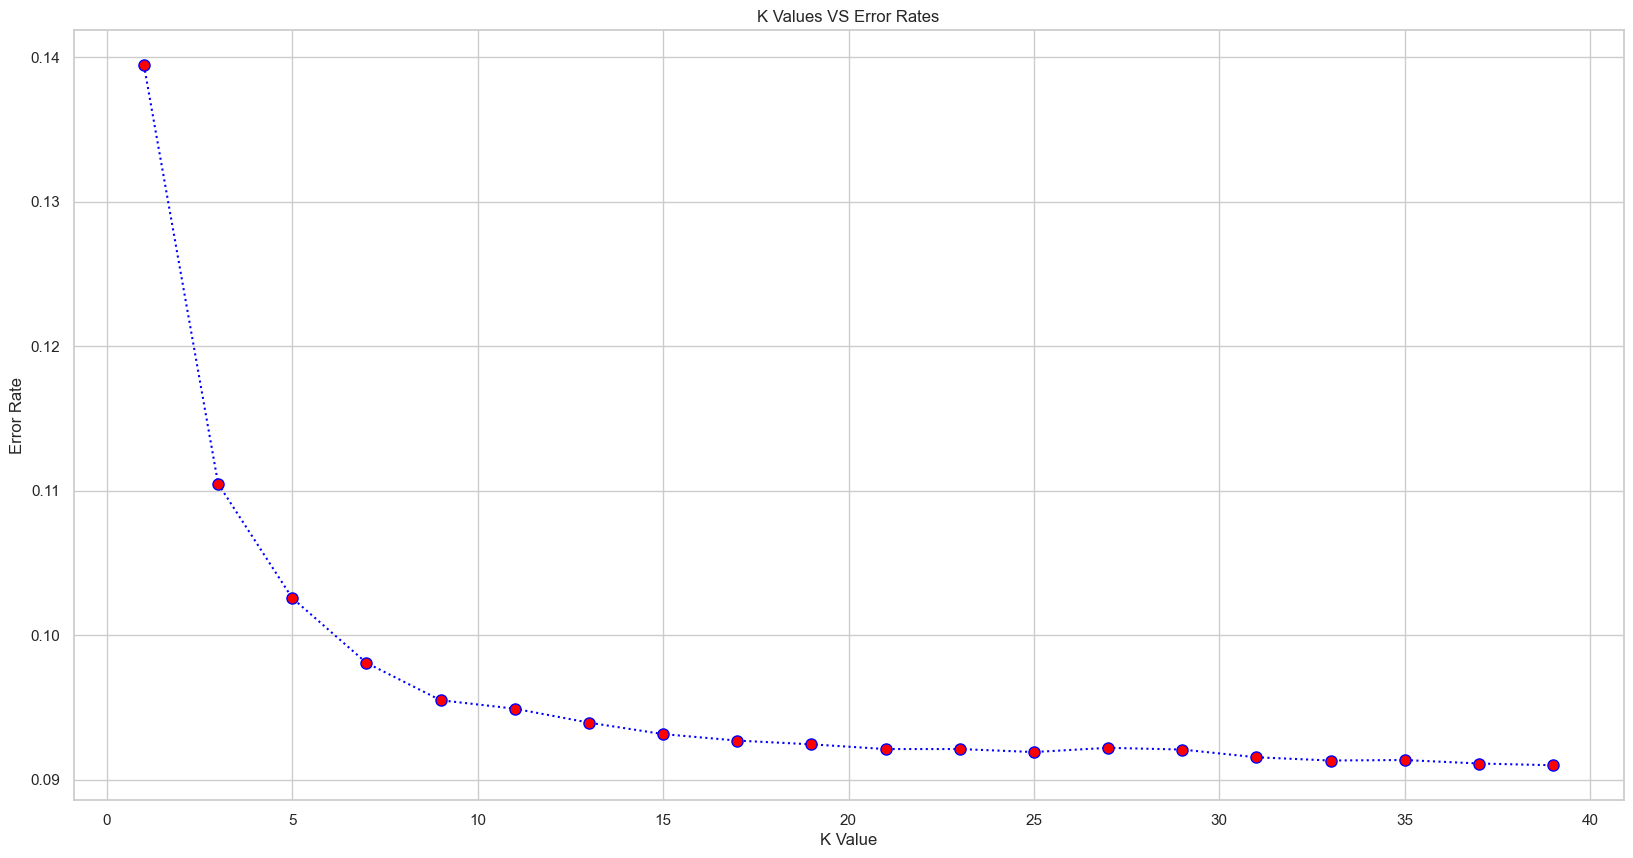

In [75]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title('K Values VS Error Rates')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [46]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_trains, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
Y_pred_knn=knn.predict(X_tests)

In [48]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 90.49 %


In [49]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_tests, y_test)

In [50]:
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9049212564469666
Precision: 0.4221422142214221
Recall: 0.08784416557407754
F1 Score: 0.14542635658914727
Cohens Kappa Score: 0.1174255969531367
Area Under Curve: 0.7265697841956209
Confusion Matrix:
 [[51992   642]
 [ 4870   469]]


## Decision Tree Algorithm 

In [51]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_trains, y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
Y_pred_clf = clf.predict(X_tests)

In [53]:
score_clf = round(accuracy_score(Y_pred_clf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_clf)+" %")

The accuracy score achieved using Decision Tree is: 85.34 %


In [54]:
# Evaluate Model
clf_eval = evaluate_model(clf, X_tests, y_test)

In [55]:
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8534317699618789
Precision: 0.23210044112656938
Recall: 0.25622775800711745
F1 Score: 0.24356805839935902
Cohens Kappa Score: 0.1626417318387703
Area Under Curve: 0.5854946135111238
Confusion Matrix:
 [[48108  4526]
 [ 3971  1368]]


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_trains,y_train)


RandomForestClassifier(random_state=0)

In [57]:
Y_pred_rf = rf.predict(X_tests)

In [58]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 89.87 %


In [59]:
rf_eval=evaluate_model(rf, X_tests, y_test)

In [60]:
# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])# Evaluate Model

Accuracy: 0.8987459679505977
Precision: 0.3545205479452055
Recall: 0.12118374227383405
F1 Score: 0.1806253489670575
Cohens Kappa Score: 0.1402863364830781
Area Under Curve: 0.7769635657257987
Confusion Matrix:
 [[51456  1178]
 [ 4692   647]]


## Comparision Of The Different Models Implemented

In [61]:
scores = [score_lr,score_knn,score_clf,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 90.91 %
The accuracy score achieved using K-Nearest Neighbors is: 90.49 %
The accuracy score achieved using Decision Tree is: 85.34 %
The accuracy score achieved using Random Forest is: 89.87 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

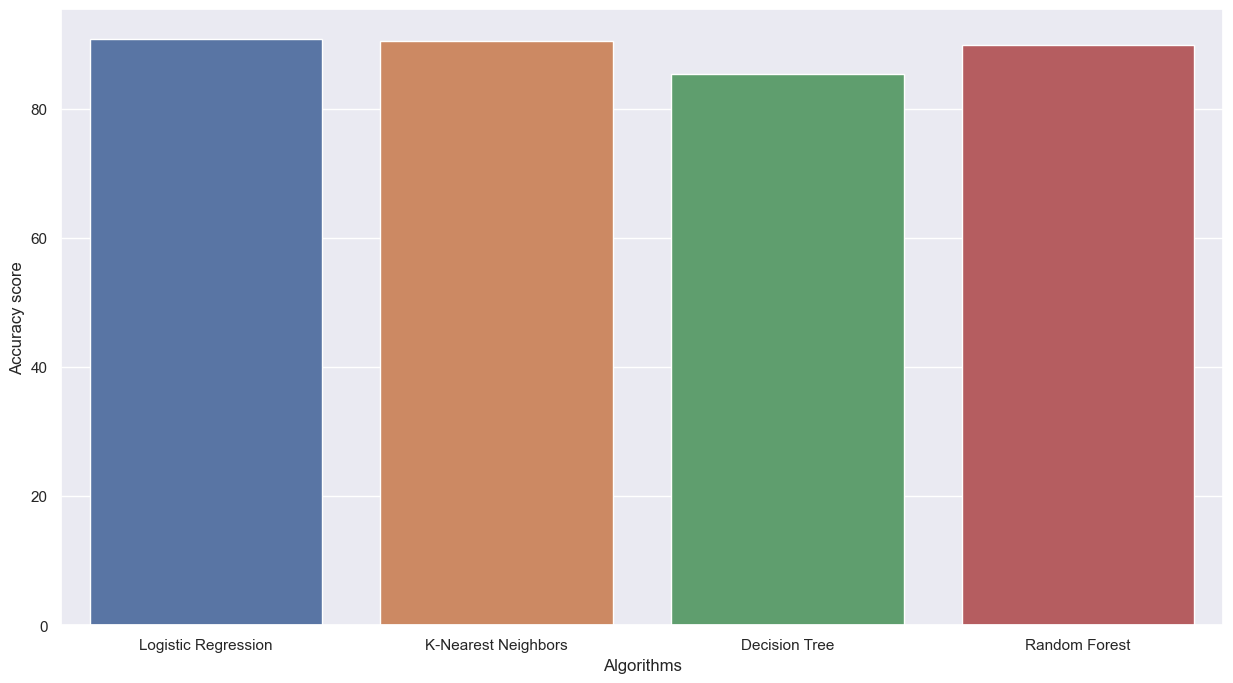

In [62]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

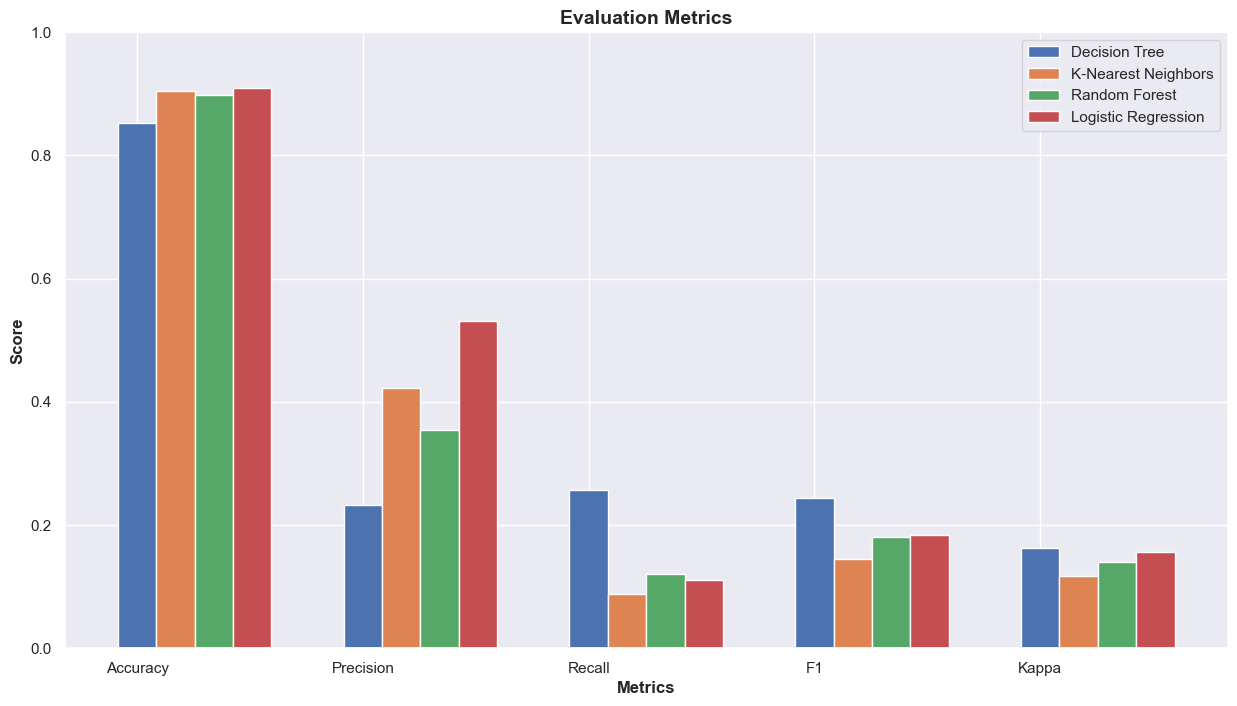

In [63]:
plt.figure(figsize=(15,8))
barWidth=0.17


lr_score= [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
#nb_score= [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rf_score= [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

plt.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
plt.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
plt.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r4, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
#plt.bar(r5, nb_score, width=barWidth, edgecolor='white', label='naive bayers')

plt.xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']

plt.xticks(r1,labels)
#plt.xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
#plt.xticklabels(labels)
plt.ylabel('Score', fontweight='bold')
plt.ylim(0, 1)

plt.title('Evaluation Metrics', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [64]:
lr_scores= [ lr_eval['prec']]
clf_scores = [ clf_eval['prec']]
knn_scores = [ knn_eval['prec']]
rf_scores= [ rf_eval['prec']]
lrg_scores= [ lrg_eval['prec']]

In [65]:
s = [lr_scores,knn_scores,clf_scores,rf_scores,lrg_scores]
algorithm = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","GridSearchCV"]    

for i in range(len(algorithm)):
    print("The precision score achieved using "+algorithm[i]+" is: "+str(s[i])+" %")

The precision score achieved using Logistic Regression is: [0.5308863025962399] %
The precision score achieved using K-Nearest Neighbors is: [0.4221422142214221] %
The precision score achieved using Decision Tree is: [0.23210044112656938] %
The precision score achieved using Random Forest is: [0.3545205479452055] %
The precision score achieved using GridSearchCV is: [0.5551181102362205] %


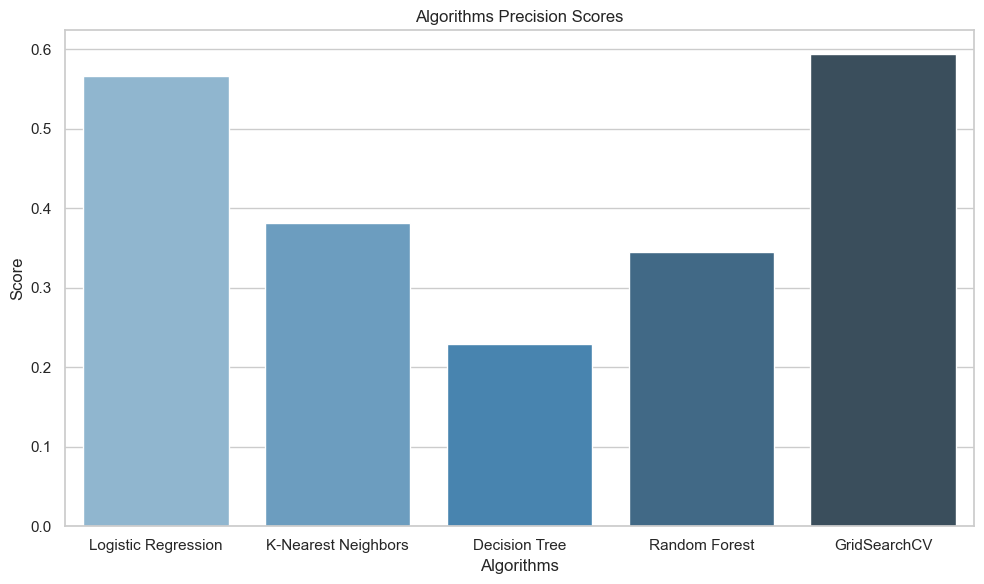

In [66]:
algorithm = ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "GridSearchCV"]
s = [[0.5665694849368319],
     [0.3813827383642115],
     [0.2293810086017878],
     [0.3443569553805774],
     [0.5937961595273265]]

# Extract the values from the nested list
s_values = [val[0] for val in s]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=algorithm, y=s_values, palette="Blues_d")

# Set plot labels and title
ax.set(xlabel="Algorithms", ylabel="Score", title="Algorithms Precision Scores")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

* In the context of predicting how likely a person has heart disease based on different attributes, a metric that would be particularly useful to consider is the "Precision". This is because:

1. High Stakes: Heart disease predictions carry serious consequences. False positives may cause unnecessary stress and tests, while false negatives can delay vital treatment.
2. Accuracy Focus: Precision measures the accuracy of positive predictions. High precision means the model accurately identifies those at risk, reducing false alarms and unwarranted actions.
3. Reducing False Positives: Precision helps minimize incorrect positive predictions, lowering the risk of unnecessary medical procedures and patient anxiety."

## Checking The Model With New Data

* In this we manually enter data, which has already been encoded in our dataset, and the model predicts whether that person has a heart disease or not.
* The X_test.columns is used to find out in which order we're supposed to enter our data in the form of an array. 
* Since there are multiple age categories, fill 1 in the actual age category of that person and 0 elsewhere.
* Each sample entered has been predicted. 0 for no heart disease and 1 for heart disease.

In [71]:
X_test.columns

Index(['onehotencoder__AgeCategory_18-24', 'onehotencoder__AgeCategory_25-29',
       'onehotencoder__AgeCategory_30-34', 'onehotencoder__AgeCategory_35-39',
       'onehotencoder__AgeCategory_40-44', 'onehotencoder__AgeCategory_45-49',
       'onehotencoder__AgeCategory_50-54', 'onehotencoder__AgeCategory_55-59',
       'onehotencoder__AgeCategory_60-64', 'onehotencoder__AgeCategory_65-69',
       'onehotencoder__AgeCategory_70-74', 'onehotencoder__AgeCategory_75-79',
       'onehotencoder__AgeCategory_80 or older',
       'onehotencoder__Race_American Indian/Alaskan Native',
       'onehotencoder__Race_Asian', 'onehotencoder__Race_Black',
       'onehotencoder__Race_Hispanic', 'onehotencoder__Race_Other',
       'onehotencoder__Race_White', 'onehotencoder__GenHealth_Excellent',
       'onehotencoder__GenHealth_Fair', 'onehotencoder__GenHealth_Good',
       'onehotencoder__GenHealth_Poor', 'onehotencoder__GenHealth_Very good',
       'remainder__BMI', 'remainder__Smoking', 'remainder_

In [67]:
new_data_s = np.array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 27.58,  1.  ,  0.  ,
        0.  , 20.  , 30.  ,  0.  ,  1.  ,  1.  ,  1.  ,  8.  ,  1.  ,
        0.  ,  0.  , 27.58,  1.  ,  0.  ,  0.  , 20.  , 30.  ,  0.  ,
        1.  ,  1.  ,  1.  ,  10.  ,  1.  ,  0.  ,  0.  ],[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  1. , 16.6,  1. ,  0. ,  0. ,  3. , 30. ,  0. ,  0. ,  1. ,
        1. ,  5. ,  1. ,  0. ,  1. , 16.6,  1. ,  0. ,  0. ,  3. , 30. ,
        0. ,  0. ,  1. ,  1. ,  5. ,  1. ,  0. ,  1. ],[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 26.58,  1.  ,  0.  ,
        0.  , 20.  , 30.  ,  0.  ,  1.  ,  1.  ,  1.  ,  8.  ,  1.  ,
        0.  ,  0.  , 26.58,  1.  ,  0.  ,  0.  , 20.  , 30.  ,  0.  ,
        1.  ,  1.  ,  1.  ,  8.  ,  1.  ,  0.  ,  0.  ],[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 28.87,  1.  ,  0.  ,
        0.  ,  6.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 12.  ,  0.  ,
        0.  ,  0.  , 28.87,  1.  ,  0.  ,  0.  ,  6.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  0.  , 12.  ,  0.  ,  0.  ,  0.  ],[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 21.63,  0.  ,  0.  ,
        0.  , 15.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  4.  ,  1.  ,
        0.  ,  1.  , 21.63,  0.  ,  0.  ,  0.  , 15.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  4.  ,  1.  ,  0.  ,  1.  ],[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        1. ,  0. , 34.3,  1. ,  0. ,  0. , 30. ,  0. ,  1. ,  1. ,  1. ,
        0. , 15. ,  1. ,  0. ,  0. , 34.3,  1. ,  0. ,  0. , 30. ,  0. ,
        1. ,  1. ,  1. ,  0. , 15. ,  1. ,  0. ,  0. ]])

In [68]:
sr = StandardScaler()
X_train_scaled = sr.fit_transform(X_train)
new_data_scaled = sr.fit_transform(new_data_s)

In [69]:
predicted_classes = lr.predict(new_data_s)

# Print the predictions one after the other
for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == 1:
        print("Prediction for Sample", i+1, ": No Heart Disease (0)")
    else:
        print("Prediction for Sample", i+1, ": Heart Disease (1)")

Prediction for Sample 1 : No Heart Disease (0)
Prediction for Sample 2 : Heart Disease (1)
Prediction for Sample 3 : No Heart Disease (0)
Prediction for Sample 4 : Heart Disease (1)
Prediction for Sample 5 : Heart Disease (1)
Prediction for Sample 6 : Heart Disease (1)


# Conclusion

In this project, we developed a predictive model for heart disease using various health parameters and machine learning algorithms. Our journey included Logistic Regression, Decision Tree, K-Nearest Neighbors, and Random Forest. Our main focus was improving the precision of the Logistic Regression baseline model.

* The Logistic Regression model served as a foundation but lacked optimal precision.
* We introduced Logistic Regression with GridSearchCV for hyperparameter optimization.
* GridSearchCV significantly increased the Logistic Regression model's precision.
* Different algorithms were compared, showcasing their unique strengths and weaknesses.
* Random Forest performed well, but Logistic Regression with GridSearchCV stood out.